In [44]:
import numpy as np
import matplotlib.pyplot as plot

x = np.linspace(-1,1,100)
t = np.linspace(0,20,1000)
X_grid,T_grid = np.meshgrid(x,t)

w1 = 2*np.pi
k1 = 0.5*np.pi

s1 = np.sin(k1*X_grid)*np.sin(w1*T_grid)
s2 = np.sin(k1*X_grid+np.pi/2)*np.sin(w1*T_grid+np.pi/2)

s12 = s1+s2

theta = 0
a1 = np.sin(w1*T_grid)*np.sin(theta) +np.sin(w1*T_grid+np.pi/2)*np.cos(theta)
a2 =np.sin(w1*T_grid)*np.sin(theta+np.pi/2) +np.sin(w1*T_grid+np.pi/2)*np.cos(theta+np.pi/2)

phi1 = np.sin(k1*X_grid)*np.sin(theta)+ np.sin(k1*X_grid+np.pi/2)*np.cos(theta)
phi2 = np.sin(k1*X_grid)*np.sin(theta+np.pi/2)+ np.sin(k1*X_grid+np.pi/2)*np.cos(theta+np.pi/2)

a12 = a1*phi1+a2*phi2



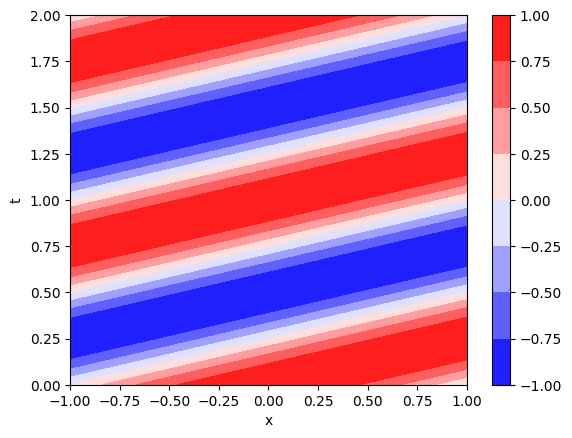

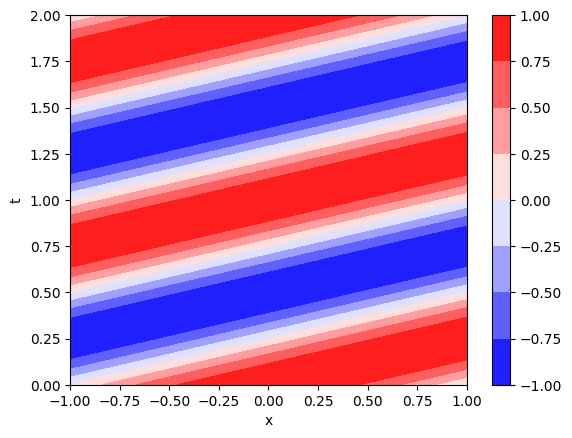

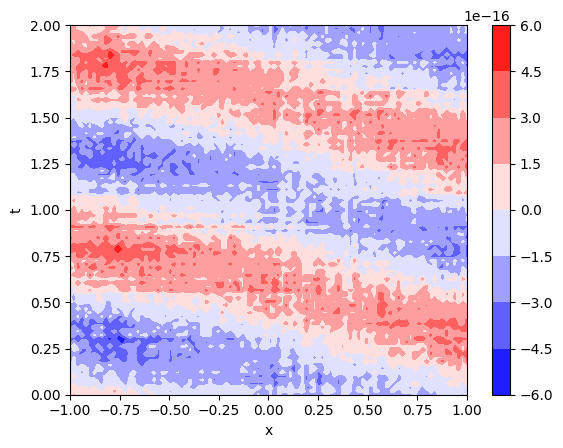

In [9]:
plot.figure(1)
plot.contourf(X_grid,T_grid,s12)
plot.set_cmap('bwr')
plot.xlabel('x')
plot.ylabel('t')
plot.colorbar()
plot.show()

plot.figure(1)
plot.contourf(X_grid,T_grid,a12)
plot.set_cmap('bwr')
plot.xlabel('x')
plot.ylabel('t')
plot.colorbar()
plot.show()

plot.figure(1)
plot.contourf(X_grid,T_grid,a12-s12)
plot.set_cmap('bwr')
plot.xlabel('x')
plot.ylabel('t')
plot.colorbar()
plot.show()

In [19]:

import numpy as np
import h5py
import matplotlib
import matplotlib.pyplot as plot
import matplotlib.ticker as tkr
import matplotlib.gridspec as gridspec

import sys
sys.path.append('F:/projects/pinns_local/code/')

figures_dir = r'F:/projects/paper_figures/t010_f2/thesis/overview/'

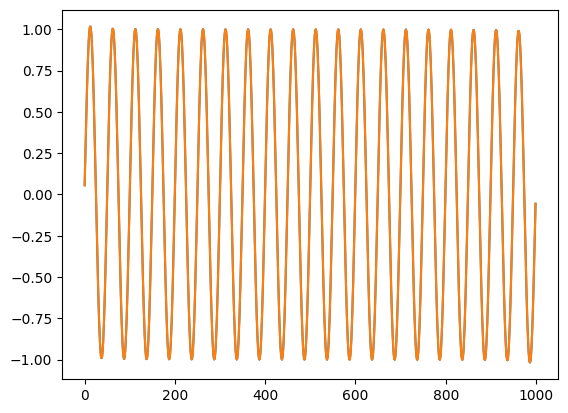

In [60]:
a1t = a1[:,0]
a2t  =a2[:,0]

from scipy.signal import hilbert

theta = np.arctan2(a2t,a1t)
theta_h = np.arctan2(np.imag(hilbert(a1t)),np.real(hilbert(a1t)))

from numpy.fft import fft, ifft

a1t_fft = fft(a1t)
a1t_fft[a1t.shape[0]//2:a1t.shape[0]] = 0
a1t_fft = 2*a1t_fft
a1t_hilb = ifft(a1t_fft)

plot.figure(1)
#plot.plot(a1t)
plot.plot(np.imag(a1t_hilb))
plot.plot(np.imag(hilbert(a1t)))
plot.show()





if False:
    fig = plot.figure(figsize=(7.5,2))
    plot.subplots_adjust(left=0.07,top=0.97,right=0.97,bottom=0.2)
    outer = gridspec.GridSpec(1,1,wspace=0.1,hspace=0.03,)

    plt_axes = []
    ax = plot.Subplot(fig,outer[0])
    h_a1 = ax.plot(t,a1t,'-r',linewidth=0.5)[0]
    h_a2 = ax.plot(t,a2t,'-b',linewidth=0.5)[0]
    h_theta = ax.plot(t,theta,'-k',linewidth=0.5)[0]
    #h_theta2 = ax.plot(t,theta_h,'-c',linewidth=0.5)[0]

    ax.set_xlim([0,2.2])
    ax.set_ylabel(r'$a_i$',fontsize=8)
    ax.set_xlabel(r't')
    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)

    ax.legend([h_a1,h_a2,h_theta],[r'$a_1$',r'$a_2$',r'$\theta=\mathrm{arctan2}(a_2,a_1)$'],fontsize=8)
    fig.add_axes(ax)

    plot.savefig(figures_dir+'PA_TC_example.png',dpi=600)
    


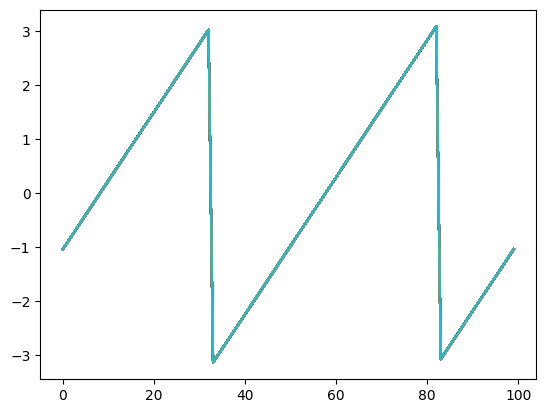

In [ ]:


plot.figure(1)
plot.plot(theta)
plot.show()